In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data=pd.read_csv("BD.csv", index_col=0)
print(data.shape)

(27870, 24)


In [3]:
data.head()

,TARGET,FI_CUSTOMER_TYPE,FI_OPEN_DATE,FI_EXISTING_CUST_IND,FI_AGE_OF_APPLICANT,FI_AGE_OF_COMPANY,FI_TIME_WITH_BANK_COMPANY,FI_TIME_WITH_BANK_APPLICANT,FI_IND_NEW_TO_BUREAU,FI_BUREAU_PER,...,FI_CHANGE_IN_TURNOVER,FI_CURREQUITY_TO_ASSETS_RATIO,FI_BANK_TURNCOMP,FI_FINANCIAL_DEBT,FI_OPERATING_PROFIT,FI_AMORTIZATION,FI_CURR_ASSETS,FI_CURR_LIABILITIES,FI_FIXED_TO_TOTAL_ASSETS_RATIO,CIFRA_AFACERI_ACORDARE
FI_ID,,,,,,,,,,,,,,,,,,,,,
290158323122922421,0,Company,20150820,N,44.84,4.0,0.01,7.03,Y,NaN,...,0.757076,-5.993696,0.0,0.0,5866.0,6708.0,19163.0,7794.0,0.488086,29102.0
180748682948053171,0,Company,20150421,N,34.99,9.0,0.04,NaN,Y,NaN,...,-0.043586,0.508571,0.0,111000.0,71537.0,4770.0,155783.0,25142.0,0.437673,67562.0
168854723046791341,0,Company,20150629,N,47.53,11.0,0.02,NaN,Y,NaN,...,0.403295,0.172389,0.0,922381.0,86779.0,298316.0,1287763.0,3237687.0,0.740966,308252.0
171429560584759061,0,Company,20150126,Y,50.75,10.0,9.45,14.08,Y,NaN,...,0.059055,0.458587,NaN,0.0,374581.0,189516.0,1057638.0,375357.0,0.029718,391300.0
310397100T27230121,0,Company,20150507,Y,44.88,2.0,2.36,4.54,Y,NaN,...,-0.931065,-1.027907,NaN,37000.0,-9720.0,62679.0,9789.0,1441.0,0.483594,1059.0


In [4]:
data["FI_AGE_OF_APPLICANT"] = data["FI_AGE_OF_APPLICANT"].replace(np.NaN, data["FI_AGE_OF_APPLICANT"].mean())

In [5]:
print(data["FI_AGE_OF_APPLICANT"][:20])

FI_ID
290158323122922421    44.840000
180748682948053171    34.990000
168854723046791341    47.530000
171429560584759061    50.750000
310397100T27230121    44.880000
285734822294629281    42.416513
305177942573205411    29.060000
131852100664045141    52.450000
162636400660205471    58.650000
17704902589206051     53.960000
264155910554755281    35.330000
161060170976640021    43.950000
255296442387191201    48.340000
159543370413989091    23.660000
186808560654152101    45.060000
254078760P97802451    60.480000
183664200A26983441    43.330000
231331200A74077001    49.150000
234137820H34652101    36.790000
265199910N48527361    40.370000
Name: FI_AGE_OF_APPLICANT, dtype: float64


In [6]:
data["FI_AGE_OF_COMPANY"] = data["FI_AGE_OF_COMPANY"].replace(np.NaN, data["FI_AGE_OF_COMPANY"].mean())
data["FI_TIME_WITH_BANK_COMPANY"] = data["FI_TIME_WITH_BANK_COMPANY"].replace(np.NaN, data["FI_TIME_WITH_BANK_COMPANY"].mean())
data["FI_NUMBER_OF_EMPLOYEES"] = data["FI_NUMBER_OF_EMPLOYEES"].replace(np.NaN, data["FI_NUMBER_OF_EMPLOYEES"].mean())
data["FI_GROSS_PROFIT_MARGIN"] = data["FI_GROSS_PROFIT_MARGIN"].replace(np.NaN, data["FI_GROSS_PROFIT_MARGIN"].mean())
data["FI_AGE_OF_COMPANY"] = data["FI_AGE_OF_COMPANY"].replace(np.NaN, data["FI_AGE_OF_COMPANY"].mean())
data["FI_CHANGE_IN_TURNOVER"] = data["FI_CHANGE_IN_TURNOVER"].replace(np.NaN, data["FI_CHANGE_IN_TURNOVER"].mean())
data["FI_CURREQUITY_TO_ASSETS_RATIO"] = data["FI_CURREQUITY_TO_ASSETS_RATIO"].replace(np.NaN, data["FI_CURREQUITY_TO_ASSETS_RATIO"].mean())
data["FI_BANK_TURNCOMP"] = data["FI_BANK_TURNCOMP"].replace(np.NaN, data["FI_BANK_TURNCOMP"].mean())
data["FI_FINANCIAL_DEBT"] = data["FI_FINANCIAL_DEBT"].replace(np.NaN, data["FI_FINANCIAL_DEBT"].mean())
data["FI_OPERATING_PROFIT"] = data["FI_OPERATING_PROFIT"].replace(np.NaN, data["FI_OPERATING_PROFIT"].mean())
data["FI_AMORTIZATION"] = data["FI_AMORTIZATION"].replace(np.NaN, data["FI_AMORTIZATION"].mean())
data["FI_CURR_ASSETS"] = data["FI_CURR_ASSETS"].replace(np.NaN, data["FI_CURR_ASSETS"].mean())
data["FI_CURR_LIABILITIES"] = data["FI_CURR_LIABILITIES"].replace(np.NaN, data["FI_CURR_LIABILITIES"].mean())
data["FI_FIXED_TO_TOTAL_ASSETS_RATIO"] = data["FI_FIXED_TO_TOTAL_ASSETS_RATIO"].replace(np.NaN, data["FI_FIXED_TO_TOTAL_ASSETS_RATIO"].mean())
data["CIFRA_AFACERI_ACORDARE"] = data["CIFRA_AFACERI_ACORDARE"].replace(np.NaN, data["CIFRA_AFACERI_ACORDARE"].mean())

In [7]:
print(data)

                    TARGET       FI_CUSTOMER_TYPE  FI_OPEN_DATE  \
FI_ID                                                             
290158323122922421       0                Company      20150820   
180748682948053171       0                Company      20150421   
168854723046791341       0                Company      20150629   
171429560584759061       0                Company      20150126   
310397100T27230121       0                Company      20150507   
...                    ...                    ...           ...   
331808542567786151       0                Company      20140618   
284662732221850311       0  Authorized Individual      20131203   
137687700897430131       0                Company      20151214   
315750252127317051       0  Authorized Individual      20140514   
305080602127658511       0                Company      20130430   

                   FI_EXISTING_CUST_IND  FI_AGE_OF_APPLICANT  \
FI_ID                                                          


In [8]:
data["FI_BUREAU_PER"] = data["FI_BUREAU_PER"].replace(np.NaN, 0)

In [9]:
print(data["FI_BUREAU_PER"][:10])

FI_ID
290158323122922421    0.000000
180748682948053171    0.000000
168854723046791341    0.000000
171429560584759061    0.000000
310397100T27230121    0.000000
285734822294629281    0.000000
305177942573205411    0.000000
131852100664045141    0.916667
162636400660205471    0.000000
17704902589206051     0.000000
Name: FI_BUREAU_PER, dtype: float64


In [10]:
data["TARGET"].value_counts()

0    26544
1     1326
Name: TARGET, dtype: int64

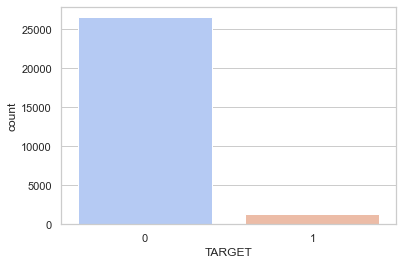

In [11]:
sns.countplot(x = 'TARGET', data=data, palette = 'coolwarm')
plt.show()

In [12]:
count_bad_cl = len(data[data['TARGET']==1])
count_good_cl = len(data[data['TARGET']==0])

pct_of_bad_cl = count_bad_cl/(count_bad_cl+count_good_cl)
print("Percentage of bad clients is", round(pct_of_bad_cl*100,2), "%")
pct_of_good_cl = count_good_cl/(count_bad_cl+count_good_cl)
print("Percentage of good clients is", round(pct_of_good_cl*100,2), "%")

Percentage of bad clients is 4.76 %
Percentage of good clients is 95.24 %


In [13]:
# Create dummy variables
cat_vars=['FI_CUSTOMER_TYPE','FI_EXISTING_CUST_IND','FI_IND_NEW_TO_BUREAU',
          'FI_INDUSTRY_CODE']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [14]:
data_final=data[to_keep]
data_final.columns.values

array(['TARGET', 'FI_OPEN_DATE', 'FI_AGE_OF_APPLICANT',
       'FI_AGE_OF_COMPANY', 'FI_TIME_WITH_BANK_COMPANY',
       'FI_TIME_WITH_BANK_APPLICANT', 'FI_BUREAU_PER',
       'FI_NUMBER_OF_EMPLOYEES', 'FI_COMPANY_PREMISES',
       'FI_GROSS_PROFIT_MARGIN', 'FI_CHANGE_IN_TURNOVER',
       'FI_CURREQUITY_TO_ASSETS_RATIO', 'FI_BANK_TURNCOMP',
       'FI_FINANCIAL_DEBT', 'FI_OPERATING_PROFIT', 'FI_AMORTIZATION',
       'FI_CURR_ASSETS', 'FI_CURR_LIABILITIES',
       'FI_FIXED_TO_TOTAL_ASSETS_RATIO', 'CIFRA_AFACERI_ACORDARE',
       'FI_CUSTOMER_TYPE_Authorized Individual',
       'FI_CUSTOMER_TYPE_Company', 'FI_EXISTING_CUST_IND_N',
       'FI_EXISTING_CUST_IND_Y', 'FI_IND_NEW_TO_BUREAU_N',
       'FI_IND_NEW_TO_BUREAU_Y', 'FI_INDUSTRY_CODE_Agriculture',
       'FI_INDUSTRY_CODE_Comerce', 'FI_INDUSTRY_CODE_Construction',
       'FI_INDUSTRY_CODE_IT Services', 'FI_INDUSTRY_CODE_Other',
       'FI_INDUSTRY_CODE_Production', 'FI_INDUSTRY_CODE_Services',
       'FI_INDUSTRY_CODE_Transportation

In [15]:
data_final.head()

,TARGET,FI_OPEN_DATE,FI_AGE_OF_APPLICANT,FI_AGE_OF_COMPANY,FI_TIME_WITH_BANK_COMPANY,FI_TIME_WITH_BANK_APPLICANT,FI_BUREAU_PER,FI_NUMBER_OF_EMPLOYEES,FI_COMPANY_PREMISES,FI_GROSS_PROFIT_MARGIN,...,FI_IND_NEW_TO_BUREAU_N,FI_IND_NEW_TO_BUREAU_Y,FI_INDUSTRY_CODE_Agriculture,FI_INDUSTRY_CODE_Comerce,FI_INDUSTRY_CODE_Construction,FI_INDUSTRY_CODE_IT Services,FI_INDUSTRY_CODE_Other,FI_INDUSTRY_CODE_Production,FI_INDUSTRY_CODE_Services,FI_INDUSTRY_CODE_Transportation
FI_ID,,,,,,,,,,,,,,,,,,,,,
290158323122922421,0,20150820,44.84,4.0,0.01,7.03,0.0,9.0,NaN,0.045575,...,0,1,0,0,0,0,1,0,0,0
180748682948053171,0,20150421,34.99,9.0,0.04,NaN,0.0,5.0,NaN,-0.001674,...,0,1,0,0,0,0,0,0,1,0
168854723046791341,0,20150629,47.53,11.0,0.02,NaN,0.0,6.0,NaN,0.058438,...,0,1,1,0,0,0,0,0,0,0
171429560584759061,0,20150126,50.75,10.0,9.45,14.08,0.0,0.0,NaN,0.277696,...,0,1,0,1,0,0,0,0,0,0
310397100T27230121,0,20150507,44.88,2.0,2.36,4.54,0.0,0.0,NaN,-7.433617,...,0,1,0,0,0,0,0,0,0,1


In [16]:
data_ready = data_final.drop(['FI_TIME_WITH_BANK_APPLICANT', 'FI_COMPANY_PREMISES', 
                              'FI_CUSTOMER_TYPE_Authorized Individual',
                             'FI_EXISTING_CUST_IND_N',
                             'FI_IND_NEW_TO_BUREAU_N',
                              ], axis=1)

In [17]:
data_ready.head()

,TARGET,FI_OPEN_DATE,FI_AGE_OF_APPLICANT,FI_AGE_OF_COMPANY,FI_TIME_WITH_BANK_COMPANY,FI_BUREAU_PER,FI_NUMBER_OF_EMPLOYEES,FI_GROSS_PROFIT_MARGIN,FI_CHANGE_IN_TURNOVER,FI_CURREQUITY_TO_ASSETS_RATIO,...,FI_EXISTING_CUST_IND_Y,FI_IND_NEW_TO_BUREAU_Y,FI_INDUSTRY_CODE_Agriculture,FI_INDUSTRY_CODE_Comerce,FI_INDUSTRY_CODE_Construction,FI_INDUSTRY_CODE_IT Services,FI_INDUSTRY_CODE_Other,FI_INDUSTRY_CODE_Production,FI_INDUSTRY_CODE_Services,FI_INDUSTRY_CODE_Transportation
FI_ID,,,,,,,,,,,,,,,,,,,,,
290158323122922421,0,20150820,44.84,4.0,0.01,0.0,9.0,0.045575,0.757076,-5.993696,...,0,1,0,0,0,0,1,0,0,0
180748682948053171,0,20150421,34.99,9.0,0.04,0.0,5.0,-0.001674,-0.043586,0.508571,...,0,1,0,0,0,0,0,0,1,0
168854723046791341,0,20150629,47.53,11.0,0.02,0.0,6.0,0.058438,0.403295,0.172389,...,0,1,1,0,0,0,0,0,0,0
171429560584759061,0,20150126,50.75,10.0,9.45,0.0,0.0,0.277696,0.059055,0.458587,...,1,1,0,1,0,0,0,0,0,0
310397100T27230121,0,20150507,44.88,2.0,2.36,0.0,0.0,-7.433617,-0.931065,-1.027907,...,1,1,0,0,0,0,0,0,0,1


In [18]:
data_ready.to_csv("data_ready.csv")

In [19]:
# Splitting the dataset into train and test
X = data_ready.loc[:, data_ready.columns != 'TARGET']
y = data_ready.loc[:, data_ready.columns == 'TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [20]:
import xgboost as xgb

In [21]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [22]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [23]:
predictions = xgb_classifier.predict(X_test)

In [24]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
from sklearn.metrics import accuracy_score
print("Accuracy of Model::",round(accuracy_score(y_test,predictions)*100, 2), "%")

Accuracy of Model:: 95.48 %


In [26]:
from xgboost import plot_importance
from matplotlib import pyplot

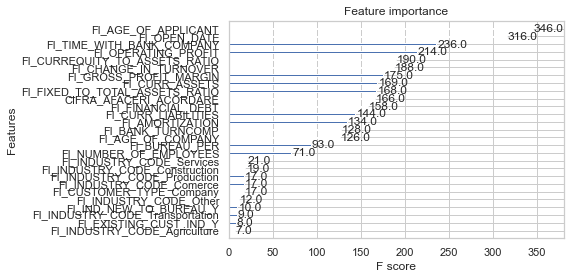

<Figure size 432x288 with 0 Axes>

In [27]:
# plot feature importance
plot_importance(xgb_classifier)
pyplot.show()
plt.savefig('Plot Importance.jpg')

In [29]:
xgb.plot_tree(xgb_classifier,num_trees=0)
plt.rcParams['figure.figsize'] = [648, 648]
plt.show()